In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
################################
# K-Means
################################

df = pd.read_csv("./USArrests.csv", index_col=0)

In [2]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [6]:
sc = MinMaxScaler((0, 1))

In [7]:
df = sc.fit_transform(df)

In [8]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [9]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
kmeans.n_clusters

4

In [12]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [13]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [14]:
kmeans.inertia_

3.683456153585914

In [15]:
kmeans = KMeans()

In [16]:
ssd = []

In [17]:
K = range(1, 30)

In [18]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

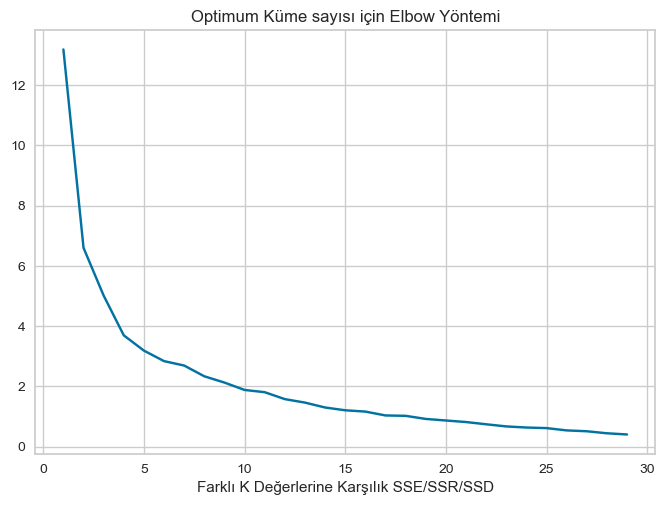

In [19]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

In [20]:
kmeans = KMeans()

In [21]:
elbow = KElbowVisualizer(kmeans, k=(2, 20))

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=19), k=(2, 20))

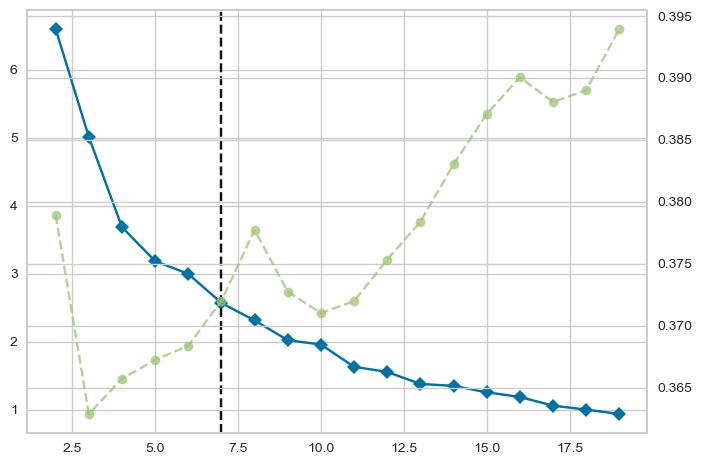

In [22]:
elbow.fit(df)

In [23]:
elbow.fit(df)
elbow.show()

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
elbow.elbow_value_

5

In [25]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
kmeans.n_clusters

5

In [27]:
kmeans.cluster_centers_

array([[0.3605852 , 0.34637965, 0.54237288, 0.3372093 ],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.11311914, 0.08523592, 0.29378531, 0.08182601],
       [0.22289157, 0.24657534, 0.81144068, 0.22286822]])

In [28]:
kmeans.labels_

array([2, 1, 1, 0, 1, 1, 4, 0, 1, 2, 4, 3, 1, 0, 3, 0, 0, 2, 3, 1, 4, 1,
       4, 2, 0, 0, 0, 1, 3, 4, 1, 1, 2, 3, 0, 0, 0, 4, 4, 2, 3, 2, 1, 4,
       3, 0, 0, 3, 3, 0])

In [29]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [30]:
clusters_kmeans = kmeans.labels_

In [31]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [32]:
df["cluster"] = clusters_kmeans

In [33]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [34]:
df["cluster"] = df["cluster"] + 1

In [35]:
df[df["cluster"] == 5]

,Murder,Assault,UrbanPop,Rape,cluster
Connecticut,3.3,110,77,11.1,5
Hawaii,5.3,46,83,20.2,5
Massachusetts,4.4,149,85,16.3,5
Minnesota,2.7,72,66,14.9,5
New Jersey,7.4,159,89,18.8,5
Pennsylvania,6.3,106,72,14.9,5
Rhode Island,3.4,174,87,8.3,5
Utah,3.2,120,80,22.9,5


In [36]:
df.groupby("cluster").agg(["count", "mean", "median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1           14   6.785714    6.7      14  146.142857  148.0       14   
2           12  10.966667   11.2      12  264.000000  259.0       12   
3            7  14.671429   14.4       7  251.285714  249.0        7   
4            9   2.677778    2.2       9   69.888889   57.0        9   
5            8   4.500000    3.9       8  117.000000  115.0        8   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        64.000000   65.5    14  20.350000  19.75  
2        76.500000   80.0    12  33.608333  32.00  
3        54.285714   58.0     7  21.685714  22.20  
4        49.333333   51.0     9  10.466667  10.80  
5        79.875000   81.5     8  15.925000  15.60

In [37]:
df.to_csv("clusters.csv")

In [2]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [3]:
sc = MinMaxScaler((0, 1))

In [4]:
df = sc.fit_transform(df)

In [6]:
hc_average = linkage(df, "average")

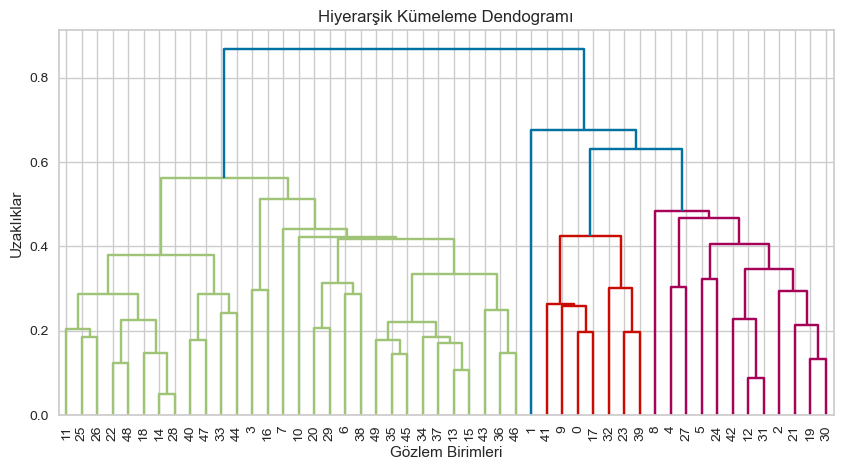

In [7]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average, leaf_font_size=10)
plt.show()

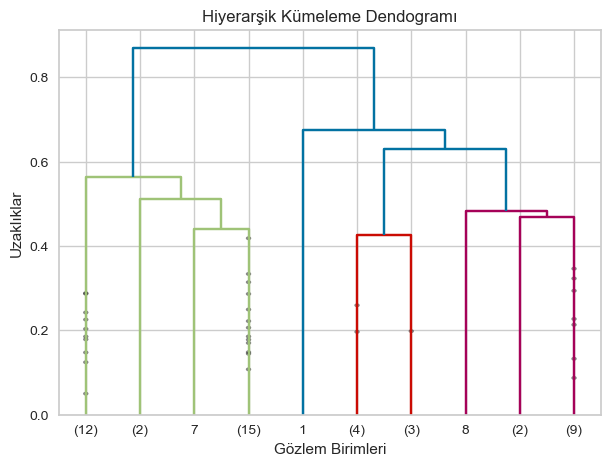

In [8]:
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(
    hc_average, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10
)

plt.show()

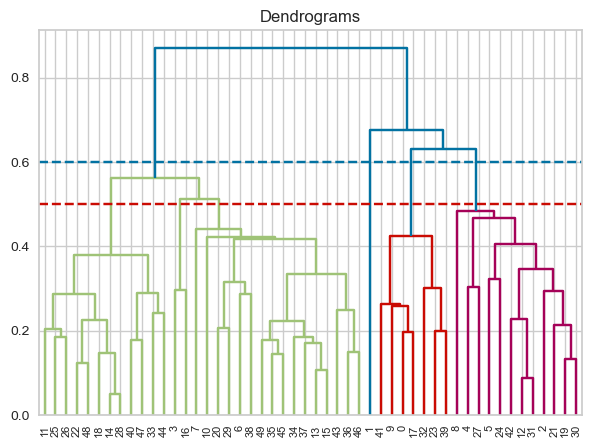

In [9]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color="r", linestyle="--")
plt.axhline(y=0.6, color="b", linestyle="--")
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

In [12]:
clusters = cluster.fit_predict(df)

In [14]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [15]:
df["hi_cluster_no"] = clusters

In [16]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [18]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [20]:
df = pd.read_csv("./clusters.csv", index_col=0)

In [21]:
df["hi_cluster_no"] = clusters

In [22]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster,hi_cluster_no
Alabama,13.2,236,58,21.2,3,3
Alaska,10.0,263,48,44.5,2,2
Arizona,8.1,294,80,31.0,2,1
Arkansas,8.8,190,50,19.5,1,0
California,9.0,276,91,40.6,2,1


In [23]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [24]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster,hi_cluster_no
Alabama,13.2,236,58,21.2,3,4
Alaska,10.0,263,48,44.5,2,3
Arizona,8.1,294,80,31.0,2,2
Arkansas,8.8,190,50,19.5,1,1
California,9.0,276,91,40.6,2,2
